## Análisis de Datos de Temperatura

- Fecha: 2024-08-14
- Coder: Boris Gabriel Garcés Proaño, 
          Hodalys Anahí López Núñez
- Objetivo: realizar la isnpección sobre los datos recolectados a través del API de openweather y usando la configuración de Linux para el registro de los mismos

In [57]:
import os
import pandas as pd
os.listdir(os.getcwd())

['main.py',
 'main.py~',
 'output.log',
 'clima-london-hoy-etl.csv',
 'temperature.png',
 'get-weather2.sh~',
 '.ipynb_checkpoints',
 'run.sh',
 'clima-london-hoy.csv',
 'CityTemperatureAnalysis.ipynb',
 'get-weather.sh',
 'weather-site']

### Lectura de Datos
Lectura del archivo csv con *with open* debido a que openweather coloca valores sobre la lluvia y la nieve cuando éstos están disponibles por lo que en este caso he obtenido 30 campos de lectura obviando los referidos. Esto puede solventarse incluyendo los campos con valor NaN por defecto en el programa de Python para captura de información

In [83]:
import csv

csv_file = 'clima-london-hoy.csv'

# Verificar si el archivo tiene contenido y cuántas filas contiene
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    rows = list(reader)
    print(f"El archivo contiene {len(rows)} filas.")


El archivo contiene 196 filas.


In [84]:
header = rows[0]
data = rows[1:]
print(len(header), len(data))

1 195


In [85]:
df = pd.read_csv('clima-london-hoy.csv', sep=";")
# df = pd.DataFrame(data, columns=header)
df.shape

(195, 31)

In [94]:
df.sample(10)

,timestamp,latitude,longitude,weather_id,weather_main,weather_description,weather_icon,base,temp,feels_like,...,dt,sys_type,sys_id,country,sunrise,sunset,timezone,city_id,city_name,cod
38,2024-08-12T20:29:40.819651,515.072,-0.1275,800.0,Clear,clear sky,01n,stations,17.81,17.55,...,1.723515e+09,2.0,2075535.0,GB,1.723524e+09,1.723577e+09,3600.0,2643743.0,London,200.0
27,2024-08-12T19:34:40.779703,515.074,-0.1278,800.0,Clear,clear sky,01n,stations,19.21,18.94,...,1.723509e+09,2.0,2075535.0,GB,1.723524e+09,1.723577e+09,3600.0,2643743.0,London,200.0
15,2024-08-12T18:34:40.733230,515.074,-0.1278,800.0,Clear,clear sky,01n,stations,20.40,20.17,...,1.723505e+09,2.0,2075535.0,GB,1.723524e+09,1.723577e+09,3600.0,2643743.0,London,200.0
94,2024-08-13T14:26:01.736989,515.074,-0.1278,801.0,Clouds,few clouds,02n,stations,20.41,20.31,...,1.723583e+09,2.0,2075535.0,GB,1.723524e+09,1.723577e+09,3600.0,2643743.0,London,200.0
103,2024-08-13T17:42:02.065989,515.084,-0.1254,803.0,Clouds,broken clouds,04n,stations,19.52,19.46,...,1.723588e+09,2.0,2075535.0,GB,1.723524e+09,1.723577e+09,3600.0,2643743.0,London,200.0
150,2024-08-13T18:29:01.959120,515.073,-0.1277,803.0,Clouds,broken clouds,04n,stations,19.40,19.33,...,1.723591e+09,2.0,2075535.0,GB,1.723611e+09,1.723664e+09,3600.0,2643743.0,London,200.0
6,2024-08-12T17:29:03.320146,515.074,-0.1278,800.0,Clear,clear sky,01n,stations,22.35,22.13,...,1.723502e+09,2.0,268730.0,GB,1.723438e+09,1.723491e+09,3600.0,2643743.0,London,200.0
29,2024-08-12T19:44:40.794635,515.074,-0.1278,800.0,Clear,clear sky,01n,stations,19.20,18.90,...,1.723510e+09,2.0,2075535.0,GB,1.723524e+09,1.723577e+09,3600.0,2643743.0,London,200.0
148,2024-08-13T18:27:02.448104,515.073,-0.1277,803.0,Clouds,broken clouds,04n,stations,19.40,19.33,...,1.723591e+09,2.0,2075535.0,GB,1.723611e+09,1.723664e+09,3600.0,2643743.0,London,200.0
112,2024-08-13T17:51:01.582441,515.074,-0.1278,803.0,Clouds,broken clouds,04n,stations,19.31,19.23,...,1.723589e+09,2.0,2075535.0,GB,1.723524e+09,1.723577e+09,3600.0,2643743.0,London,200.0


### Análisis de Datos
- Se procede a realizar un plot de variables de interés según el tiempo capturado. La primera columna contiene la información del API sobre tiempo en formato **Timestamp**, misma que se puede convertir a **datetime**.
- Debido al proceso utilizado para guardar los datos `dt` tiene como tipo de dato objeto por lo que es necesario convertirlo a entero. De igual manera existen otras variables capturadas que en este caso por la lectura con `with open` se detectan como object en vez de sus tipos de datos correctos


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            195 non-null    object 
 1   latitude             193 non-null    float64
 2   longitude            193 non-null    float64
 3   weather_id           193 non-null    float64
 4   weather_main         193 non-null    object 
 5   weather_description  193 non-null    object 
 6   weather_icon         193 non-null    object 
 7   base                 193 non-null    object 
 8   temp                 193 non-null    float64
 9   feels_like           193 non-null    float64
 10  temp_min             193 non-null    float64
 11  temp_max             193 non-null    float64
 12  pressure             193 non-null    float64
 13  humidity             193 non-null    float64
 14  sea_level            193 non-null    float64
 15  grnd_level           193 non-null    flo

In [108]:
df.dropna(inplace=True)
print(df.shape)
df.dt = df.dt.astype(int)
# df.sys_sunrise = df.sys_sunrise.astype(int)
# df.sys_sunset = df.sys_sunset.astype(int)
# for column in df.columns:
#     try:
#         df[column] = pd.to_numeric(df[column])
#     except ValueError:
#         next

(24, 31)


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 4 to 38
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            24 non-null     object 
 1   latitude             24 non-null     float64
 2   longitude            24 non-null     float64
 3   weather_id           24 non-null     float64
 4   weather_main         24 non-null     object 
 5   weather_description  24 non-null     object 
 6   weather_icon         24 non-null     object 
 7   base                 24 non-null     object 
 8   temp                 24 non-null     float64
 9   feels_like           24 non-null     float64
 10  temp_min             24 non-null     float64
 11  temp_max             24 non-null     float64
 12  pressure             24 non-null     float64
 13  humidity             24 non-null     float64
 14  sea_level            24 non-null     float64
 15  grnd_level           24 non-null     float64
 1

In [110]:
from datetime import datetime
df_etl = df.copy()
df_etl.dt = df.dt.apply(lambda x: datetime.fromtimestamp(x))
# df_etl.sys_sunrise = df.sys_sunrise.apply(lambda x: datetime.fromtimestamp(x))
# df_etl.sys_sunset = df.sys_sunset.apply(lambda x: datetime.fromtimestamp(x))
df_etl.sample(5)

,timestamp,latitude,longitude,weather_id,weather_main,weather_description,weather_icon,base,temp,feels_like,...,dt,sys_type,sys_id,country,sunrise,sunset,timezone,city_id,city_name,cod
21,2024-08-12T19:04:40.764349,515.072,-0.1276,800.0,Clear,clear sky,01n,stations,19.82,19.61,...,2024-08-12 19:00:02,2.0,2075535.0,GB,1.723524e+09,1.723577e+09,3600.0,2643743.0,London,200.0
9,2024-08-12T17:57:34.345244,515.073,-0.1276,800.0,Clear,clear sky,01n,stations,21.18,20.97,...,2024-08-12 17:50:09,2.0,2075535.0,GB,1.723438e+09,1.723491e+09,3600.0,2643743.0,London,200.0
10,2024-08-12T17:58:20.555726,515.073,-0.1276,800.0,Clear,clear sky,01n,stations,21.18,20.97,...,2024-08-12 17:50:09,2.0,2075535.0,GB,1.723438e+09,1.723491e+09,3600.0,2643743.0,London,200.0
18,2024-08-12T18:49:40.741345,515.074,-0.1278,800.0,Clear,clear sky,01n,stations,19.84,19.60,...,2024-08-12 18:46:46,2.0,2075535.0,GB,1.723524e+09,1.723577e+09,3600.0,2643743.0,London,200.0
7,2024-08-12T17:29:23.354607,515.074,-0.1278,800.0,Clear,clear sky,01n,stations,22.35,22.13,...,2024-08-12 17:26:50,2.0,268730.0,GB,1.723438e+09,1.723491e+09,3600.0,2643743.0,London,200.0


Generalmente es de interés realizar un breve análisis estadístico de las variables del dataset

In [111]:
df_etl.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
latitude,24.0,515.074167,515.072,515.07375,515.074,515.074,515.085,0.002531
longitude,24.0,-0.127667,-0.128,-0.1278,-0.1278,-0.1276,-0.1257,0.000433
weather_id,24.0,800.0,800.0,800.0,800.0,800.0,800.0,0.0
temp,24.0,20.522917,17.81,19.6225,20.07,20.9925,27.79,1.91637
feels_like,24.0,20.354167,17.55,19.3925,19.83,20.7825,29.25,2.215691
temp_min,24.0,19.240417,16.12,18.63,18.9,19.59,26.12,1.798155
temp_max,24.0,21.412083,18.4,20.48,21.03,22.14,28.45,1.957265
pressure,24.0,1008.958333,1007.0,1009.0,1009.0,1009.0,1010.0,0.464306
humidity,24.0,64.375,57.0,62.75,65.0,67.0,73.0,3.774197
sea_level,24.0,1008.958333,1007.0,1009.0,1009.0,1009.0,1010.0,0.464306


In [112]:
df_etl.to_csv('clima-london-hoy-etl.csv', index=False)

### Presentación de Resultados

Se procede a realizar gráficas de interés para estudiar el comportamiento climatológico

Text(0.5, 1.0, 'Temp vs Time in London')

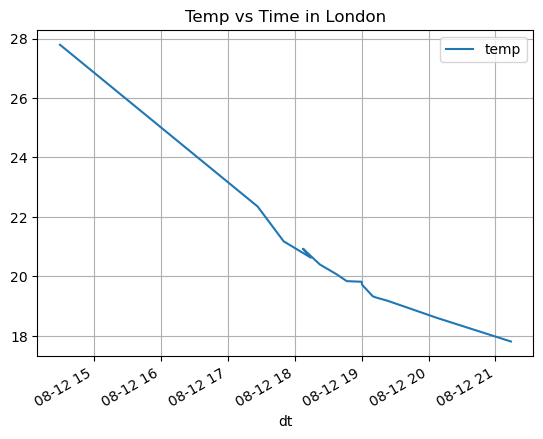

In [113]:
import matplotlib.pyplot as plt
df_etl.plot.line('dt', 'temp')
plt.grid()
plt.title(f'Temp vs Time in {next(iter(set(df_etl.city_name)))}')

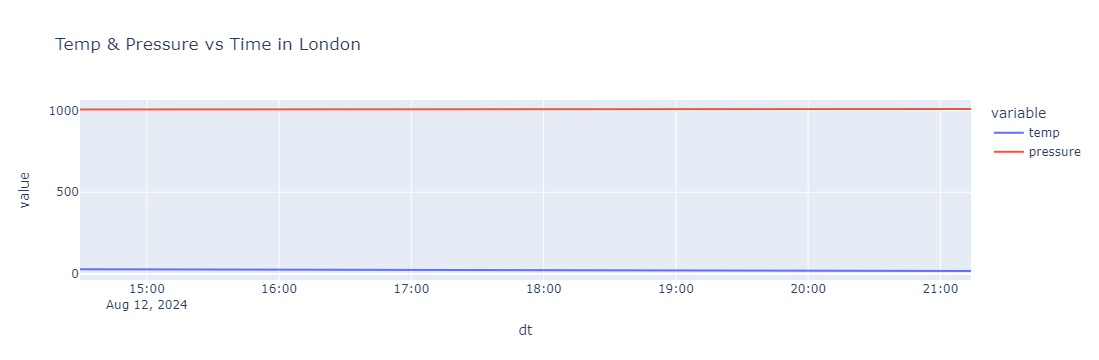

<Figure size 640x480 with 0 Axes>

In [114]:
import plotly_express as px
fig = px.line(df_etl, x='dt', y=['temp', 'pressure'], title=f"Temp & Pressure vs Time in {next(iter(set(df_etl.city_name)))}")
fig.show()
fname = '/home/hodalys/LondonWeather/weather-site/content/images/temperature&pressure.png'
plt.savefig(fname)

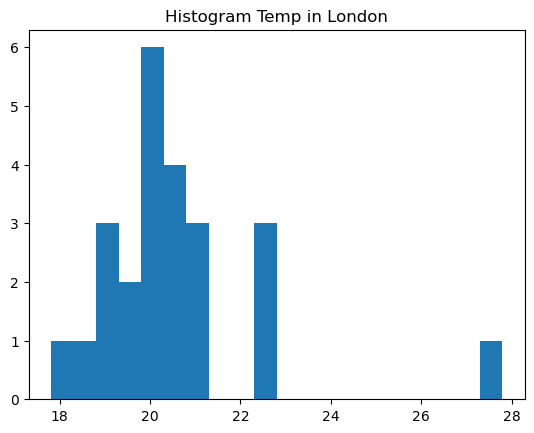

In [115]:
df_etl.temp.hist(bins=20)
plt.title(f'Histogram Temp in {next(iter(set(df_etl.city_name)))}')
plt.grid()

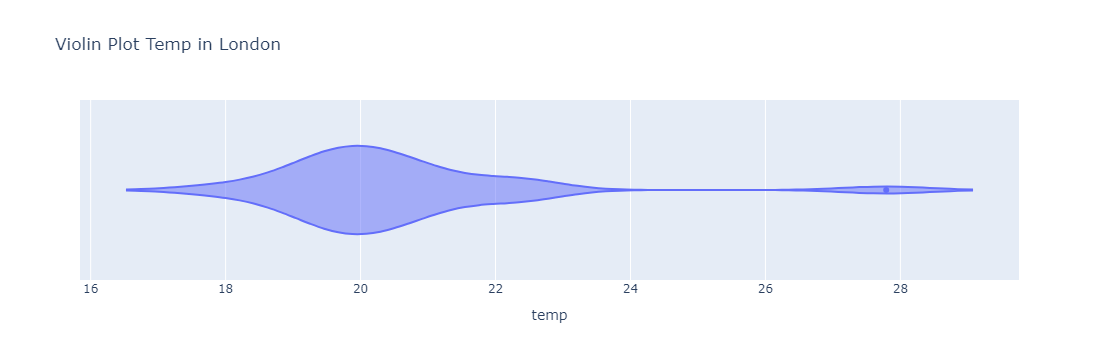

In [116]:
fig = px.violin(df_etl, 'temp', title=f"Violin Plot Temp in {next(iter(set(df_etl.city_name)))}")
fig.show()

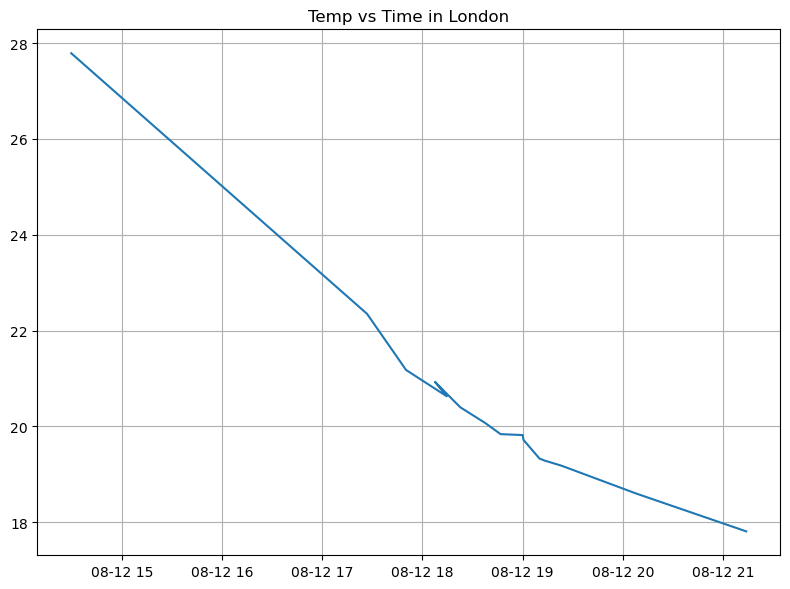

In [117]:
fig = plt.figure(figsize=(8,6))
plt.plot(df_etl['dt'], df_etl['temp'])
plt.grid()
plt.title(f'Temp vs Time in {next(iter(set(df_etl.city_name)))}')
fig.tight_layout()
fname = '/home/hodalys/LondonWeather/weather-site/content/images/temperature.png'
plt.savefig(fname)

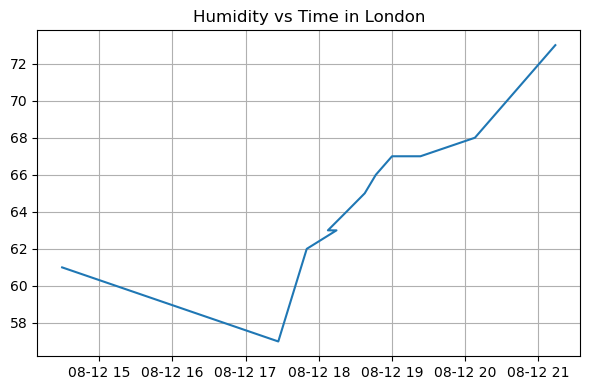

In [118]:
fig = plt.figure(figsize=(6,4))
plt.plot(df_etl['dt'], df_etl['humidity'])
plt.grid()
plt.title(f'Humidity vs Time in {next(iter(set(df_etl.city_name)))}')
fig.tight_layout()
fname = '/home/hodalys/LondonWeather/weather-site/content/images/humidity.png'
plt.savefig(fname)

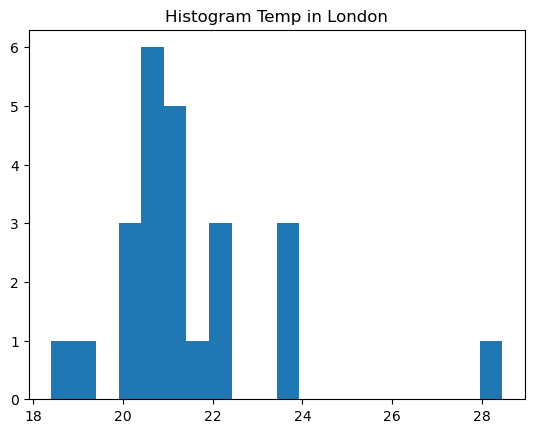

In [122]:
df_etl.temp_max.hist(bins=20)
plt.title(f'Histogram Temp in {next(iter(set(df_etl.city_name)))}')
plt.grid()